   # TP53: Effects of Mutation

<b>Standard imports for playing with and plotting data frames.</b>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

<b>Import CPTAC data</b>

In [2]:
import CPTAC

Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******


In [17]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()
maf = pd.read_csv('/U')

AttributeError: module 'CPTAC' has no attribute 'get_patient_mutations'

### Proteome abundance of TP53 difference between mutated and non-mutated

In [4]:
gene = 'TP53'
protList = ['TP53']

pcutoff = 0.05/len(protList)

genedf = somatic_mutations[gene].to_frame()
for protein in protList:
    if protein in proteomics.columns:
        proteindf = proteomics[protein].to_frame()
        proteindfName = protein + " protein"
        proteindf.columns = [proteindfName]
        cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)
        mutated = cross.loc[cross[gene] == 1.0]
        wt = cross.loc[cross[gene] == 0.0]
        ttest = scipy.stats.ttest_ind(mutated[proteindfName], wt[proteindfName])
        print("Test for " + protein + ": ")
        print(ttest)

Test for TP53: 
Ttest_indResult(statistic=5.87288377126809, pvalue=7.869064487646565e-08)


<b>Boxplot</b>

[Text(0,0.5,'Proteomics'), Text(0.5,0,'Somatic Gene Mutation')]

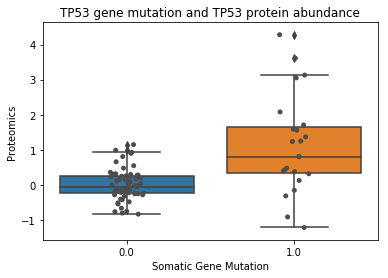

In [5]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=proteindfName)
somatic_boxplot.set_title(gene + " gene mutation and " + protList[0] + " protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=proteindfName,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")

### Conclusion: TP53 has a higher abundance when mutated

### Phosphoproteome abundance difference in TP53 between mutated and non-mutated

In [6]:
gene = 'TP53'
sites = phos.filter(regex='TP53')
sigResults = [];

genedf = somatic_mutations[gene].to_frame()
cross = genedf.add(sites, fill_value=0)
mutated = cross.loc[cross[gene] == 1.0]
wt = cross.loc[cross[gene] == 0.0]

pcutoff = 0.05/len(cross.columns)
#pcutoff = 1

for loc in cross.columns:
    if not loc == gene:
        mutsitedf = mutated[[gene, loc]].dropna()
        wtsitedf = wt[[gene, loc]].dropna()
        ttest = scipy.stats.ttest_ind(mutsitedf[loc], wtsitedf[loc])
        if ttest[1] <= pcutoff:
            sigResults.append(loc)
            print('Results for ' + loc + ': ')
            print(ttest)

Results for TP53-S315: 
Ttest_indResult(statistic=4.5116732692720705, pvalue=2.81407273681229e-05)
Results for TP53BP1-S1431: 
Ttest_indResult(statistic=4.819602521158986, pvalue=6.619797586243582e-06)
Results for TP53BP1-S1435: 
Ttest_indResult(statistic=4.74121449433656, pvalue=7.210127219127611e-06)
Results for TP53BP1-S1683: 
Ttest_indResult(statistic=4.687964245279931, pvalue=9.535677192577145e-06)
Results for TP53BP1-S1706: 
Ttest_indResult(statistic=5.643489011660524, pvalue=3.294769768234183e-07)
Results for TP53BP1-S1763: 
Ttest_indResult(statistic=7.045858275075653, pvalue=7.196228903923844e-10)
Results for TP53BP1-S1764: 
Ttest_indResult(statistic=4.387625978778714, pvalue=3.4228154547355373e-05)
Results for TP53BP1-S867: 
Ttest_indResult(statistic=4.364161237074746, pvalue=5.013280141618629e-05)


In [7]:
x = 0
print(sigResults[x])

TP53-S315


[Text(0,0.5,'Phosphoproteomics'), Text(0.5,0,'Somatic Gene Mutation')]

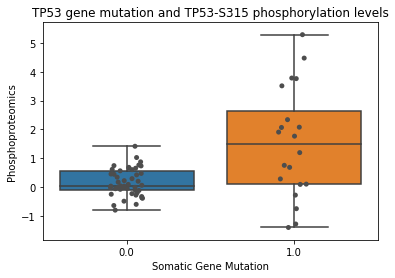

In [8]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=sigResults[x])
somatic_boxplot.set_title(gene + " gene mutation and " + sigResults[x] + " phosphorylation levels")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=sigResults[x],jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Phosphoproteomics")

### Proteome abundance of interacting proteins

In [9]:
gene = 'TP53'
protList = ['AXIN1', 'EP300', 'HRMT1L2', 'CARM1', 'TAF1', 'ING4', 'CABLES1', 
            'TP73', 'HIPK1', 'HIPK2', 'TP53INP1', 'WWOX', 'HCV', 'USP7', 'SYVN1', 'HSP90AB1',
           'CHD8', 'ARMC10', 'BANP', 'CDKN2AIP', 'NUAK1', 'STK11', 'LKB1', 'UHRF2', 'E4F1', 'YWHAZ',
           'MAML1', 'MKRN1', 'PML', 'MDM2', 'FBXO42', 'ATM', 'PP2R2A', 'AURKA', 'DAXX', 'BRD7', 'TRIM24',
           'L3MBTL1', 'GRK5', 'CAK', 'PTK2B', 'PYK2', 'MDM2', 'PRKCG', 'PPIF', 'KAT6A', 'UBC9', 'ZNF385B',
           'ZNF385A', 'ANKRD2', 'RFFL', 'RNF34', 'MTA1', 'COP1', 'CCAR2', 'MORC3', 'POU4F2', 'AFG1L', 'UBD',
           'TAF6', 'HPV', 'UL123', 'E1B-55K']
sigList = [];

pcutoff = 0.05/len(protList)

genedf = somatic_mutations[gene].to_frame()
for protein in protList:
    if protein in proteomics.columns:
        proteindf = proteomics[protein].to_frame()
        proteindfName = protein + " protein"
        proteindf.columns = [proteindfName]
        cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)
        mutated = cross.loc[cross[gene] == 1.0]
        wt = cross.loc[cross[gene] == 0.0]
        ttest = scipy.stats.ttest_ind(mutated[proteindfName], wt[proteindfName])
        if ttest[1] <= pcutoff:
            sigList.append(protein)
            print("Test for " + protein + ": ")
            print(ttest)

Test for CABLES1: 
Ttest_indResult(statistic=-4.533885225055603, pvalue=1.6398425638878636e-05)
Test for HSP90AB1: 
Ttest_indResult(statistic=3.775761395509814, pvalue=0.000273573248009503)
Test for CHD8: 
Ttest_indResult(statistic=4.65599574118626, pvalue=1.0132380205138297e-05)
Test for AURKA: 
Ttest_indResult(statistic=4.2121494006965365, pvalue=8.335995102753076e-05)
Test for DAXX: 
Ttest_indResult(statistic=4.139121723641875, pvalue=7.383403320014249e-05)


In [10]:
protNum = 4
protein = sigList[protNum]

proteindf = proteomics[protein].to_frame()
proteindfName = protein
proteindf.columns = [proteindfName]
cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)

print(sigList[protNum])

DAXX


[Text(0,0.5,'Proteomics'), Text(0.5,0,'Somatic Gene Mutation')]

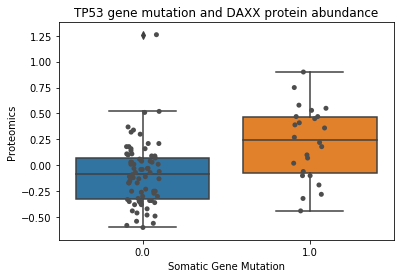

In [11]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=protein)
somatic_boxplot.set_title(gene + " gene mutation and " + protein + " protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=protein,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")

### Phosphoproteome abundance of interacting proteins

In [12]:
gene = 'TP53'
genedf = somatic_mutations[gene].to_frame()
sigResults = [];

for protein in protList:
    sites = phos.filter(regex=protein)
    genedf = genedf.add(sites, fill_value=0)
    
print(genedf.head())

mutated = genedf.loc[cross[gene] == 1.0]
wt = genedf.loc[cross[gene] == 0.0]

for loc in cross.columns:
    if not loc == gene:
        mutsitedf = mutated[[gene, loc]].dropna()
        wtsitedf = wt[[gene, loc]].dropna()
        ttest = scipy.stats.ttest_ind(mutsitedf[loc], wtsitedf[loc])
        print('Results for ' + loc + ': ')
        print(ttest)
 

      ANKRD26-S530  ANKRD26-S631  ANKRD27-S418  ANKRD27-T1023  ARMC10-S45  \
S001         -0.46         -0.60         -0.60           0.11         NaN   
S002         -1.01         -0.09          1.66          -0.37         NaN   
S003           NaN          0.51         -0.31            NaN       -0.07   
S004          0.31          0.45         -0.75            NaN         NaN   
S005          0.67         -2.31          0.03            NaN        0.78   

      ATM-S1981  ATM-T1885  AXIN1-S493  AXIN1-S77  AXIN1-T79      ...       \
S001      -0.15        NaN         NaN       0.58       0.39      ...        
S002        NaN        NaN       -0.17       0.22      -0.41      ...        
S003      -0.28        0.2         NaN        NaN        NaN      ...        
S004        NaN       -0.3        0.51      -0.19        NaN      ...        
S005        NaN        NaN        0.51       0.25        NaN      ...        

      USP7-S18  USP7-S963  WWOX-S14  WWOX-T12  YWHAZ-S110  YWHAZ-S11

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [ ]:
sites = phos.filter(regex='TP53')
sigResults = [];

genedf = somatic_mutations[gene].to_frame()
cross = genedf.add(sites, fill_value=0)
mutated = cross.loc[cross[gene] == 1.0]
wt = cross.loc[cross[gene] == 0.0]

pcutoff = 0.05/len(cross.columns)
#pcutoff = 1

for loc in cross.columns:
    if not loc == gene:
        mutsitedf = mutated[[gene, loc]].dropna()
        wtsitedf = wt[[gene, loc]].dropna()
        ttest = scipy.stats.ttest_ind(mutsitedf[loc], wtsitedf[loc])
        if ttest[1] <= pcutoff:
            sigResults.append(loc)
            print('Results for ' + loc + ': ')
            print(ttest)

### BCL2

In [ ]:
gene = 'TP53'
sites = phos.filter(regex='BCL2')
sigResults = [];

genedf = somatic_mutations[gene].to_frame()
cross = genedf.add(sites, fill_value=0)
mutated = cross.loc[cross[gene] == 1.0]
wt = cross.loc[cross[gene] == 0.0]

pcutoff = 0.05/len(cross.columns)
#pcutoff = 1

for loc in cross.columns:
    if not loc == gene:
        mutsitedf = mutated[[gene, loc]].dropna()
        wtsitedf = wt[[gene, loc]].dropna()
        ttest = scipy.stats.ttest_ind(mutsitedf[loc], wtsitedf[loc])
        if ttest[1] <= pcutoff:
            sigResults.append(loc)
            print('Results for ' + loc + ': ')
            print(ttest)

In [ ]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y='BCL2L12-S273')
somatic_boxplot.set_title(gene + " gene mutation and BCL2L12-S273 phosphorylation")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y='BCL2L12-S273',jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Phosphoproteomics")

### TP53 mutation --> more phoshporylation at this site (--> less BCL2?)

### Test for phosphorylation levels and protein abundance

In [ ]:
phosProt = phos.filter(regex='BCL2') 
protein = 'BCL2'

proteindf = proteomics[protein].to_frame()
cross = proteindf.add(phosProt, fill_value=0)

pcutoff = 0.05/len(cross.columns)
print(pcutoff)

for loc in cross.columns:
    if not loc == protein:
        oneSitedf = cross[[loc, protein]].dropna(axis=0)
        pearsonresult = pearsonr(oneSitedf[loc], oneSitedf[protein])
        if(pearsonresult[1] <= pcutoff):
            print("Results for " + loc)
            print(pearsonresult)

<b>Plot of the data. You'll have to enter the phosphorylation site and protein you want</b>

In [ ]:
alt.Chart(cross).mark_point().encode(
    alt.X('BCL2L13-S315', type='quantitative', axis=alt.Axis(title="Phosphorylation at BCL2L13-S315")),
    alt.Y('BCL2', type='quantitative', axis=alt.Axis(title="BCL2 Protein Abundance"))
).interactive()